In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
online_shoppers_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [3]:
df = pd.read_csv(online_shoppers_DATASET)

* `Administrative` - тип страница, общее время проведенное на странице, число  
* `Administrative_Duration` - тип страница, общее время проведенное на странице, число  
* `Informational` - тип страница, общее время проведенное на странице, число  
* `Informational Duration` - тип страница, общее время проведенное на странице, число  
* `Product Related` - тип страница, общее время проведенное на странице, число  
* `Product Related Duration` - тип страница, общее время проведенное на странице, число  
* `Bounce Rate` -  процент посетителей  которые заходят на сайт с этой страницы, а затем уходят ("отскакивают"), не вызывая никаких других запросов к серверу аналитики в течение этой сессии.
* `Exit Rate` - для конкретной веб-страницы рассчитывается как процентное соотношение всех просмотров страницы, которые были последними в сессии.
* `Page Value` -  представляет собой среднюю стоимость веб-страницы, которую посетил пользователь перед завершением операции электронной коммерции.
* `Special Day` - указывает на близость времени посещения сайта к определенному особому дню
* `Month` - дата
* `OperatingSystems` - оперативная система
* `Browser` - браузер
* `Region` - регион
* `TrafficType` - тип трафика
* `VisitorType` - тип визита
* `Weekend` - выходные
* `Revenue` - выручка (таргет)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#пропущенные значение
df.isna().mean()

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     0.016139
ProductRelated             0.000000
ProductRelated_Duration    0.039822
BounceRates                0.000000
ExitRates                  0.008029
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

В прошлый раз мы проводили описательный анализ данных и обнаружили пропущенные значения в столбцах "Informational_Duration", "ProductRelated_Duration", "ExitRates". Так как эти данные содержат выбросы, мы заменили пропуски медианой, чтобы минимизировать влияние выбросов на анализ.

In [7]:
df['Informational_Duration'].fillna(df['Informational_Duration'].quantile(0.5), inplace=True)
df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].quantile(0.5), inplace=True)
df['ExitRates'].fillna(df['ExitRates'].quantile(0.5), inplace=True)

In [8]:
df.isna()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Наивный байесовский классификатор

In [9]:
X = df.select_dtypes(include='number').fillna(0)
y = df['Revenue'] * 1

In [10]:
y.value_counts(normalize=True)

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

Группы в наборе данных распределены неравномерно, то это может повлиять на процесс обучения и оценки качества классификатора

При оценке качества классификатора важно использовать метрики, которые учитывают неравномерное распределение классов, такие как precision, recall, F1-мера, а также ROC-кривая и площадь под ней (AUC-ROC).

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict_proba(X_test)[:, 1]

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred > 0.5)

0.840739539409666

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred > 0.5)

array([[2347,  247],
       [ 244,  245]])

In [16]:
print(classification_report(y_test,y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2594
           1       0.50      0.50      0.50       489

    accuracy                           0.84      3083
   macro avg       0.70      0.70      0.70      3083
weighted avg       0.84      0.84      0.84      3083



 Для группы 1 значение precision составляет 0.5, тогда как для группы 0 оно около 0.91. Это означает, что классификатор демонстрирует более низкую точность в предсказании положительных событий для группы 1 по сравнению с группой 0.

# Кросс-валидация

In [17]:
from sklearn.model_selection import cross_validate

cross_validate(gnb, X, y, scoring=['accuracy', 'f1', 'precision'], cv=3, n_jobs=-1)

{'fit_time': array([0.01374292, 0.02872014, 0.01277137]),
 'score_time': array([0.01634645, 0.03935432, 0.01699519]),
 'test_accuracy': array([0.87761557, 0.82457421, 0.81143552]),
 'test_f1': array([0.55368234, 0.47101981, 0.48641484]),
 'test_precision': array([0.63543788, 0.44154058, 0.42038946])}

Результаты precision на кросс-валидации колеблются от 0.42 до 0.63

Посмотрим как измениться качество модели после маштабирование данных

In [18]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler()

In [19]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
col = X_train.columns

In [21]:
X_train = pd.DataFrame(X_train_sc, columns=col)
X_test = pd.DataFrame(X_test_sc, columns=col)

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict_proba(X_test)[:, 1]

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred > 0.5)

0.8164125851443399

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred > 0.5)

array([[2189,  405],
       [ 161,  328]])

In [26]:
print(classification_report(y_test,y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      2594
           1       0.45      0.67      0.54       489

    accuracy                           0.82      3083
   macro avg       0.69      0.76      0.71      3083
weighted avg       0.85      0.82      0.83      3083



Маштабирование отрицатально сказалась на прогнозирование данных

## Подбор гиперпараметров по сетке

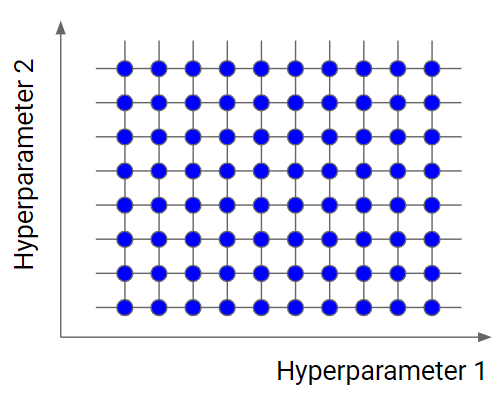

Для обучение используем

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(18, 20, 2),
          'leaf_size': np.arange(2, 12, 2),
          # 'algorithm': ['ball_tree'],
          'weights' : ['distance', 'uniform'],
          'p' : [1]}

gs = GridSearchCV(model, params, scoring='average_precision', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([ 2,  4,  6,  8, 10]),
                         'n_neighbors': array([18]), 'p': [1],
                         'weights': ['distance', 'uniform']},
             scoring='average_precision', verbose=2)

In [56]:
gs.best_score_, gs.best_params_

(0.4867333087898548,
 {'leaf_size': 4, 'n_neighbors': 18, 'p': 1, 'weights': 'distance'})

In [57]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.8566331495296788

In [58]:
confusion_matrix(y_test, pred)

array([[2574,   20],
       [ 422,   67]])

In [60]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2594
           1       0.77      0.14      0.23       489

    accuracy                           0.86      3083
   macro avg       0.81      0.56      0.58      3083
weighted avg       0.85      0.86      0.81      3083



Сделаем маштабирование

In [66]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
col = X_train.columns
X_train = pd.DataFrame(X_train_sc, columns=col)
X_test = pd.DataFrame(X_test_sc, columns=col)

In [89]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(18, 20, 2),
          'leaf_size': np.arange(2, 12, 2),
          # 'algorithm': ['ball_tree'],
          'weights' : ['distance', 'uniform'],
          'p' : [1]}

gs = GridSearchCV(model, params, scoring='average_precision', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([ 2,  4,  6,  8, 10]),
                         'n_neighbors': array([18]), 'p': [1],
                         'weights': ['distance', 'uniform']},
             scoring='average_precision', verbose=2)

In [90]:
gs.best_score_, gs.best_params_

(0.5252916547171765,
 {'leaf_size': 2, 'n_neighbors': 18, 'p': 1, 'weights': 'distance'})

In [91]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.8611741809925397

In [92]:
confusion_matrix(y_test, pred)

array([[2579,   15],
       [ 413,   76]])

In [93]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2594
           1       0.84      0.16      0.26       489

    accuracy                           0.86      3083
   macro avg       0.85      0.57      0.59      3083
weighted avg       0.86      0.86      0.82      3083



Произошло увеличение precision при одновременном снижении recall, модель плохо работает в положительными классами

# Добавим категориальные данные

In [167]:
X_full = df.drop('Revenue', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [168]:
X_train_full.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [206]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


categorical = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(include=['float', 'int']).columns


ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [207]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Month_aug',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [208]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048227,0.013857,0.000000,0.025641,0.215062,0.0,0.142857,0.083333,0.0,0.052632
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.005674,0.000838,0.000000,0.250000,0.000000,0.0,0.285714,0.083333,0.0,0.526316
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.002837,0.001891,0.000000,0.250000,0.000000,0.0,0.285714,0.083333,0.0,0.105263
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.024113,0.002981,0.111111,0.196296,0.000000,0.0,0.285714,0.083333,0.0,0.631579
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.015603,0.002290,0.090909,0.090909,0.000000,0.0,0.000000,0.000000,0.0,0.052632


In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('transformer', ct), # преобразование данных
    # ('poly', PolynomialFeatures(degree=3),) # добавление полиномиальных признаков,
    # ('selector', SelectKBest()), # оставляем самые важные признаки,
    ('model', KNeighborsClassifier()) # обучение модели
    ])

pipe.fit(X_train_full, y_train_full)

pred_pipe = pipe.predict(X_test_full)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Month', 'VisitorType'], dtype='object')),
                                                 ('scaling', MinMaxScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [173]:
accuracy_score(y_test_full, pred_pipe)

0.8553357119688615

In [174]:
params = {
    'model__n_neighbors': np.arange(10, 20, 2),
    'model__weights': ['distance', 'uniform'],
    'model__p': [1, 2],
}


gs = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train_full, y_train_full)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Month', 'VisitorType'], dtype='object')),
                                                                        ('scaling',
                                                                         MinMaxScaler(),
                                                                         Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object'))])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([10, 12, 14, 16, 18]),
                         'model__p': [1, 2],
                         'model__weights': ['distance', 'uniform']},
             scoring='accuracy', verbose=2)

In [175]:
gs.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Month', 'VisitorType'], dtype='object')),
                                                 ('scaling', MinMaxScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object'))])),
                ('model',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])

In [176]:
pred = gs.best_estimator_.predict(X_test_full)

accuracy_score(y_test_full, pred)

0.859552384041518

In [177]:
confusion_matrix(y_test_full, pred)

array([[2558,   36],
       [ 397,   92]])

In [178]:
print(classification_report(y_test_full, pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2594
           1       0.72      0.19      0.30       489

    accuracy                           0.86      3083
   macro avg       0.79      0.59      0.61      3083
weighted avg       0.84      0.86      0.82      3083



Увеличели recall означает, что модель лучше улавливает истинно положительные случаи

## Explainer Dashboard

In [127]:
!pip install explainerdashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.3 MB/s eta 0:00:00


In [201]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [202]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [210]:
explainer = ClassifierExplainer(gs.best_estimator_, X_test_transformed.iloc[:10], y_test_full.iloc[:10])

splitting pipeline...
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [211]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarni

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...


/usr/local/lib/python3.10/dist-packages/explainerdashboard/explainer_plots.py:422: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has 

Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [212]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


TypeError: 'NoneType' object cannot be interpreted as an integer

1. какие факторы наиболее важны в среднем для получения прогноза?
Ответ:
* PageValues
* ExitRates
* Administrative

2. какие значения метрик получились и что это значит?
Ответ:
* Класс несбалансированы, низкое значение recall указывает на то, что модель пропускает много истинно положительных случаев. Модель имеет тенденцию к ложноотрицательным ошибкам

3. Aнализ 2-3 индивидуальных прогнозов с комментарием
Ответ:
* 2 индекс. Модель в 80.75% предсказала 0 класс. Пороговое значание классов находится на уровне biseline_pred = 71.36.
Ср. равна 81.97% самое больше влияные из признаков оказывают: Month_Nov -7.45%, PageValues +3.36%

* 1 индекс. Модель с 28.6% предсказывает 1 класс.
biseline_pred = 71.36.
Самое больше влияные из признаков оказывают: Administrative  -4.34%, Administrative_Duration  -3.28%